<a href="https://colab.research.google.com/github/barta3235/DeepLearning/blob/main/RNN_StockPrice/GoogleStock_RNN_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train=pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

Applying normalization (feature Scaling)

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

**Creating a datastructure with 60 timesteps and 1 output**

In [4]:
#iteration 1
#x_train.append(training_set_scaled[0:60, 0]): Appends the data
#from indices 0 to 59 (60 data points) from the first column
#of training_set_scaled to x_train.

#y_train.append(training_set_scaled[60, 0]): Appends the value
#at index 60 from the first column of training_set_scaled to y_train

#iteration 2
#x_train.append(training_set_scaled[1:61, 0]): Appends the data
#from indices 1 to 60 (60 data points) from the first column
#of training_set_scaled to x_train.

#y_train.append(training_set_scaled[61, 0]): Appends the value
#at index 61 from the first column of training_set_scaled to y_train


x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i, 0])   # 0 specifies the column # 0 to 59
  y_train.append(training_set_scaled[i, 0])        # 60th

x_train, y_train= np.array(x_train) ,np.array(y_train)

In [5]:
print(x_train[0])
print(y_train[0])
print("\n"+"x_train shape: ")
print(x_train.shape)
print(x_train.shape[0])   # number of rows or data sample
print(x_train.shape[1])   # number of columns or timesteps

[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
 0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
 0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
 0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
 0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
 0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
 0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
 0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
 0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]
0.08627874097775134

x_train shape: 
(1198, 60)
1198
60


Reshaping (adding more dimensionality to the existing data structure)

In [6]:
# to add dimension in an numpy array we use the reshape function

#The additional dimension is usually required by RNNs
#and LSTMs because they expect input data in a 3D format,
#where the dimensions correspond to (batch_size, time_steps, features).

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1198, 60, 1)


Building RNN

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initializing the RNN

In [8]:
regressor= Sequential()  # predicting a continuous value

LSTM layer and some dropout layer


In [9]:
#LSTM(number of units, return sequences, (timesteps, features))

#This parameter determines whether the LSTM layer should return
#the full sequence of outputs for each input sequence or just the
#last output. If return_sequences is set to True, the layer will
#return the full sequence; if set to False (default), it will only
#return the output corresponding to the last time step.
#Returning sequences is useful when stacking multiple recurrent layers.


regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [11]:
# adding the output layer

regressor.add(Dense(units=1))   # stock price at t+1

Adding optimizer and training

In [12]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

No. of batches =
Total Number of Samples/Batch Size
1198/32 =38

In [13]:
regressor.fit(x_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 23s 108ms/step - loss: 0.0406
Epoch 2/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 6s 172ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 5s 145ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0044
Epoch 13/100

Getting stock price of 2017 (Real)

In [14]:
dataset_test=pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')
test_set = dataset_test.iloc[:,1:2].values

Getting stock price of 2017 (Predicted)

In [15]:
# here for predicting stock price of jan 2017 we need previous 60 stocks prices,
# hence for that we are required to use the training dataset as the test dataset has only 2017 data.
# Now for the end of jan 2017 or other months of 2017 we need need the test set.
# So we need to concat both the train and test set

# Problem with concat -- we have to scale the concatenation of test and train set
# problem is we are changing the test values due to concat
# we have to keep the test values as they are.

dataset_total= pd.concat((dataset_train['Open'],dataset_test['Open']),axis= 0)  # for vertical concat axis=0
inputs = dataset_total[len(dataset_total)-len(dataset_test) -60 : ].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)     # sc obejct is already scaled previously


x_test=[]
# no need of y test as we making prediction
for i in range(60,80):
  x_test.append(inputs[i-60:i, 0])   # 0 specifies the column # 0 to 59


x_test= np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

y_test_pred=regressor.predict(x_test)
# our regressor was trained to predict scaled value of stock prices
y_test_pred=sc.inverse_transform(y_test_pred)





1/1 [==============================] - 2s 2s/step


Visualization

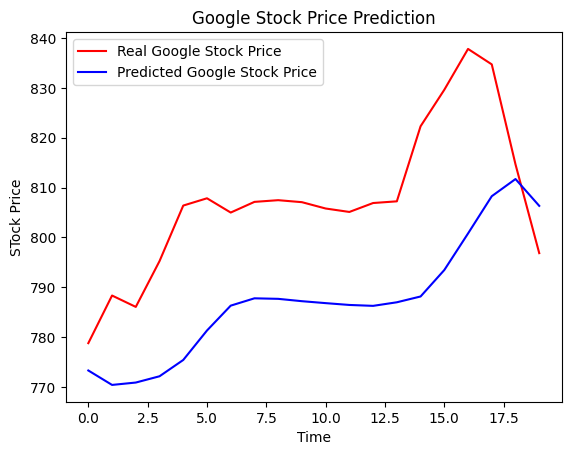

In [16]:
plt.title('Google Stock Price Prediction')
plt.plot(test_set, color='red', label= "Real Google Stock Price")
plt.plot(y_test_pred, color='blue', label= "Predicted Google Stock Price")
plt.xlabel('Time')
plt.ylabel('STock Price')
plt.legend()
plt.show()

**Understanding: Our model react good to smooth changes.
our model cannot react to fast linear changes(the spikes)**